# Labor 08 - Lineáris regresszió regularizálása és Bias - Variancia
### Vízfolyás
A feladat első felében implementálásra kerül egy lineáris regresszió, hogy előre jelezhessük a kifolyt víz mennyiségét egy tartályból, annak alapján, hogy abban mennyi víz van. A feladat második felében megfigyeljük a tanulóalgoritmusok debuggolását és a bias illetve variancia típusú hibákat.

### 1: Importálás, adatok betöltése és vizualizálása

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as op

# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import regularizers
from keras import optimizers


from numpy.random import seed
seed(1)

data = loadmat("Lab8data.mat")                          # adatok betöltése
X_train = data["X"]                                     # adatok szerkesztése változókba
Y_train = data["y"]
X_val   = data["Xval"]
Y_val   = data["yval"]
X_test  = data["Xtest"]
Y_test  = data["ytest"]

del data
m,n = X_train.shape
print('Shape of X:', X_train.shape)
print('Shape of Y:', Y_train.shape)

Shape of X: (12, 1)
Shape of Y: (12, 1)


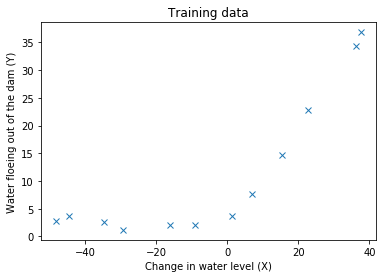

In [16]:
plt.plot(X_train,Y_train,'x')   # adatok megjelenítése
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.show()

A machine learning addig tart, ahol a deep learning elkezdődik. A határ az egy rétegű neurális háló.

### Linearizált regresszió büntetéssel

In [17]:
Lambda = 0
lr_rate = 0.005
epoch = 40

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(1, input_shape=(1,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))

# compiling the sequential model
sgd = optimizers.SGD(lr=lr_rate)
model.compile(loss='MSE', optimizer=sgd)

# training the model and saving metrics in history
history = model.fit(X_train, Y_train, epochs=epoch, validation_data=(X_val, Y_val), verbose = 2)

Train on 12 samples, validate on 21 samples
Epoch 1/40
 - 0s - loss: 682.8117 - val_loss: 489.8742
Epoch 2/40
 - 0s - loss: 439.9911 - val_loss: 381.8707
Epoch 3/40
 - 0s - loss: 321.4046 - val_loss: 309.2116
Epoch 4/40
 - 0s - loss: 263.3241 - val_loss: 287.2525
Epoch 5/40
 - 0s - loss: 234.7127 - val_loss: 266.5474
Epoch 6/40
 - 0s - loss: 220.4547 - val_loss: 262.8616
Epoch 7/40
 - 0s - loss: 213.1884 - val_loss: 255.9813
Epoch 8/40
 - 0s - loss: 209.3285 - val_loss: 255.5853
Epoch 9/40
 - 0s - loss: 207.1289 - val_loss: 252.7219
Epoch 10/40
 - 0s - loss: 205.7390 - val_loss: 252.5965
Epoch 11/40
 - 0s - loss: 204.7448 - val_loss: 251.0493
Epoch 12/40
 - 0s - loss: 203.9445 - val_loss: 250.7404
Epoch 13/40
 - 0s - loss: 203.2398 - val_loss: 249.6853
Epoch 14/40
 - 0s - loss: 202.5830 - val_loss: 249.2133
Epoch 15/40
 - 0s - loss: 201.9507 - val_loss: 248.3652
Epoch 16/40
 - 0s - loss: 201.3315 - val_loss: 247.7980
Epoch 17/40
 - 0s - loss: 200.7199 - val_loss: 247.0450
Epoch 18/40
 

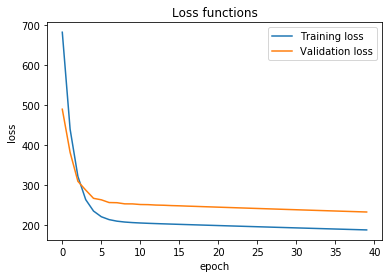

In [18]:
# plotting the metrics
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'])

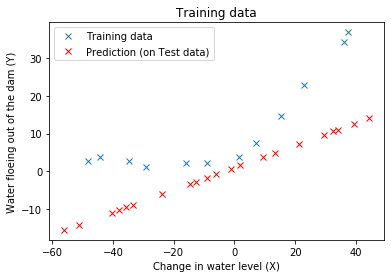

In [27]:
Y_pred = model.predict(X_test)

plt.plot(X_train,Y_train,'x')   # adatok megjelenítése
plt.plot(X_test,Y_pred,'x', color='red')   # adatok megjelenítése
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Training data', 'Prediction (on Test data)'])
plt.show()

# Poly Feature

In [20]:
def polyFeatures(X,p =9):
    
    m=X.shape[0]
    X_poly = np.zeros((m,p))
    
    for i in range(1,m+1):
        for j in range(1,p+1):
            X_poly[i-1,j-1] = X[i-1]**j
    
    return X_poly

def featureNormalize(X):
    
    avg = np.mean(X, axis = 0)
    X_norm = X-avg
    std = np.std(X_norm, axis = 0,ddof = 1)
    X_norm = X_norm/std
    
    return X_norm,avg,std

In [133]:
#just Right
Lambda = 0
lr_rate = 0.01
epoch = 100
order=9
optim = optimizers.SGD(lr=lr_rate)

In [118]:
#Overfit
Lambda = 0
lr_rate = 0.001
epoch = 500
order=12
optim = optimizers.Adam(lr=lr_rate)

In [134]:
# X:
X_train_p = polyFeatures(X_train, order)                                # polynomial features
X_train_pn, mu, sigma = featureNormalize(X_train_p)                     # feature normalization

# X_val:
X_val_p = polyFeatures(X_val, order)
X_val_pn = (X_val_p-mu)/sigma

# X_TESZT:
X_test_p = polyFeatures(X_test, order)
X_test_pn = (X_test_p-mu)/sigma

print("""Expected Normalized Training Example for order=3 (approx.):
[-0.362 -0.755  0.182 ]""")
print('Normalized Training Example 1:\n',X_train_pn[0,:])

Expected Normalized Training Example for order=3 (approx.):
[-0.362 -0.755  0.182 ]
Normalized Training Example 1:
 [-0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792 -0.59087767
  0.3445158  -0.50848117  0.35954927]


In [135]:
# building a linear stack of layers with the sequential model
model2 = Sequential()
model2.add(Dense(order, input_shape=(order,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))
model2.add(Dense(1))

# compiling the sequential model
optim = optimizers.SGD(lr=lr_rate)
optim = optimizers.Adam(lr=lr_rate)
model2.compile(loss='MSE', optimizer=optim)

# training the model and saving metrics in history
history2 = model2.fit(X_train_pn, Y_train, epochs=epoch, validation_data=(X_val_pn, Y_val), verbose = 2)

Train on 12 samples, validate on 21 samples
Epoch 1/100
 - 1s - loss: 280.2574 - val_loss: 315.8577
Epoch 2/100
 - 0s - loss: 277.3937 - val_loss: 311.9953
Epoch 3/100
 - 0s - loss: 274.1847 - val_loss: 308.0171
Epoch 4/100
 - 0s - loss: 270.8740 - val_loss: 304.0082
Epoch 5/100
 - 0s - loss: 267.5271 - val_loss: 299.9800
Epoch 6/100
 - 0s - loss: 264.1556 - val_loss: 295.9101
Epoch 7/100
 - 0s - loss: 260.7532 - val_loss: 291.7720
Epoch 8/100
 - 0s - loss: 257.3111 - val_loss: 287.5460
Epoch 9/100
 - 0s - loss: 253.8214 - val_loss: 283.2172
Epoch 10/100
 - 0s - loss: 250.2784 - val_loss: 278.7723
Epoch 11/100
 - 0s - loss: 246.6788 - val_loss: 274.1986
Epoch 12/100
 - 0s - loss: 243.0196 - val_loss: 269.4856
Epoch 13/100
 - 0s - loss: 239.2979 - val_loss: 264.6255
Epoch 14/100
 - 0s - loss: 235.5109 - val_loss: 259.6129
Epoch 15/100
 - 0s - loss: 231.6556 - val_loss: 254.4445
Epoch 16/100
 - 0s - loss: 227.7294 - val_loss: 249.1190
Epoch 17/100
 - 0s - loss: 223.7300 - val_loss: 243.6

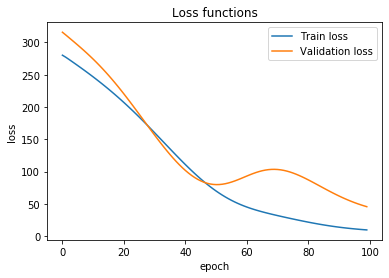

In [136]:
# plotting the metrics
fig = plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'])

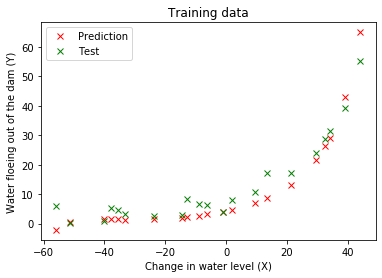

In [137]:
Y_pred2 = model2.predict(X_test_pn)

#plt.plot(X_train,Y_train,'x')   # adatok megjelenítése
plt.plot(X_test,Y_pred2,'x', color="red") 
plt.plot(X_test,Y_test,'x', color="green") 
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Prediction', 'Test'])
plt.show()